## Investigation Overview

> The goal of this presentation is to analyze the Pima Indian Diabetes and German Diabetes datasets with similar variables from kaggle.com. There has been research to indicate that Pima Indian women have a higher rate of diabetes than the general public. In this case the general public refers to the German women. This presentation will investigate the following :
1. The correlation between the eight health variables. 
2. The correlation between the Pima and German women in relationship to the eight health variables.
3. Hypothesis testing investigating differences in diabetic averages between Pima and German women. 



## Dataset Overview : 9 predictor variables and 1 target variable (outcome)

<span style="background-color:yellow">pregnancies</span> Number of times pregnant (preg)  
<span style="background-color:yellow">glucose</span> Plasma glucose concentration a 2 hours in an oral glucose tolerance test (plas) (**Note**: Normal range is less than 140mg/dL )       
<span style="background-color:yellow">blood_pressure</span> Diastolic blood pressure in mm Hg (pres) (**Note**: Normal range is less than 80)      
<span style="background-color:yellow">skin_thickness</span> Triceps skin fold thickness in mm (skin) - there is some relationship between measurements of subcutaneous fat in skinfolds, such as the triceps skinfold, and deep body fat. 
(**Note**: Normal measurement around 23mm)    
<span style="background-color:yellow">insulin</span> 2-Hour serum insulin in mu U/ml (insu  )  
(**Note**: This test measures the amount of insulin for glucose absorption. Normal range is 16 - 166 mu U/ml)  
<span style="background-color:yellow">BMI</span> Body mass index measured as weight in kg/(height in m)^2(mass)    
(**Note**: BMI correlates with the amount of body fat. Normal range is 18.5 - 24.9)  
<span style="background-color:yellow">diabetes_pedigree_function</span> Diabetes pedigree function (pedi)    
(**Note**: This function is a measure of genetic influence one might have with the onset of diabetes.    
The higher the proportion the more genetic influence there is.)  
<span style="background-color:yellow">Age</span> in years    
<span style="background-color:yellow">ethnicity</span> (Pima or Dutch)  
<span style="background-color:yellow">Outcome</span>     
(**Note**: '0' implies 'no diabetes' and '1' implies 'diabetes')  

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# filter warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# load the combined dataset
df_combined_clean = pd.read_csv('combined_clean.csv',engine='python')

In [3]:
# load the clean Pima Indian dataset
df_pima_clean = pd.read_csv('pima_clean.csv',engine='python')

In [4]:
# load the clean Germany dataset
df_germany_clean = pd.read_csv('germany_clean.csv',engine='python')

## <span style="color:red">HEATMAP</span>

**The heatmap plot on the next slide below shows the correlation of the eight health variables of the combined Pima and German datasets with the diabetic outcome. The correlation of value 1 is the highest and that of 0 is the lowest.**

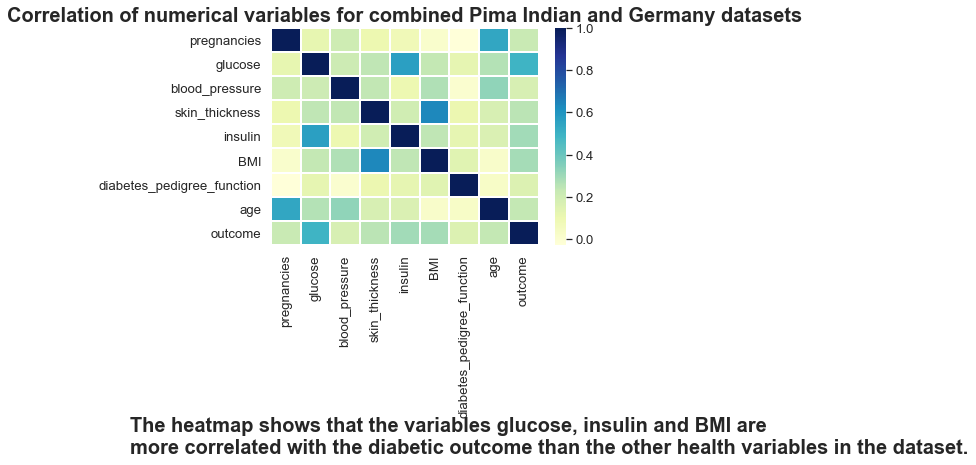

In [5]:
# how do the predictor variables correlate with each other for both pima and dutch women
sns.set(font_scale=1.2)
sns.heatmap(df_combined_clean.corr(),cmap="YlGnBu", linecolor='white', linewidths=1)
plt.title('Correlation of numerical variables for combined Pima Indian and Germany datasets',fontsize=20,\
          fontweight='bold')
plt.gcf().text(-0.2, -0.6, 'The heatmap shows that the variables glucose, insulin and BMI are \nmore correlated with the diabetic outcome than the other health variables in the dataset.', fontsize=20, fontweight='bold')
plt.show()

**<span style="background-color:yellow">Note: </span> From the heatmap shown above, 'glucose', 'insulin' and 'BMI' are more correlated with diabetic 'outcome' than the other variables in the dataset.**

## <span style="color:red">POINTPLOT</span>

**On the next slide below, the group of subplots labeled <span style="background-color:yellow">'Mean of numerical variables grouped by Pima and Dutch categories'</span> shows that the variables with the largest mean differences are glucose, skin thickness, insulin, BMI, and age.  
Pima has higher mean for pregnancies, insulin, and age. There is a slight higher mean for diabetes pedigree function.**  

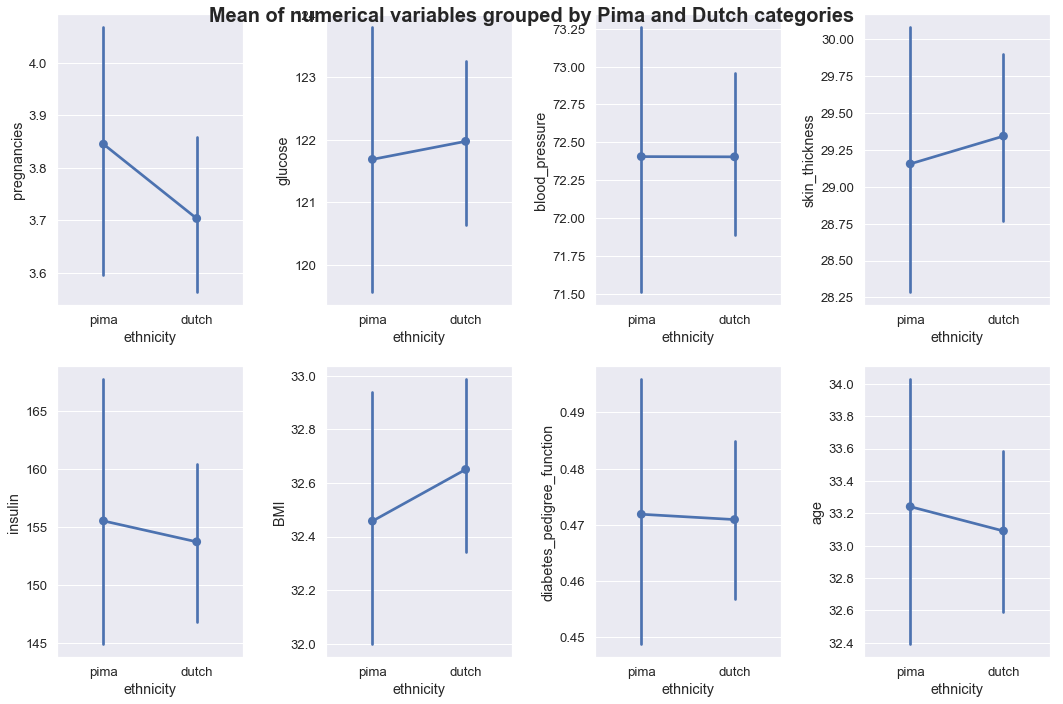

In [6]:
fig, axs = plt.subplots(2,4,figsize=(15,10))

sns.catplot(data=df_combined_clean, x='ethnicity', y='pregnancies', kind='point', ax=axs[0,0])
sns.catplot(data=df_combined_clean[df_combined_clean.glucose.notnull()],x='ethnicity', y='glucose', \
            kind='point', ax=axs[0,1]) 
sns.catplot(data=df_combined_clean[df_combined_clean.blood_pressure.notnull()], x='ethnicity', y='blood_pressure',\
            kind='point', ax=axs[0,2])
sns.catplot(data=df_combined_clean[df_combined_clean.skin_thickness.notnull()], x='ethnicity', y='skin_thickness',\
            kind='point', ax=axs[0,3])
sns.catplot(data=df_combined_clean[df_combined_clean.insulin.notnull()], x='ethnicity', y='insulin',\
            kind='point', ax=axs[1,0])
sns.catplot(data=df_combined_clean[df_combined_clean.BMI.notnull()], x='ethnicity', y='BMI',\
            kind='point', ax=axs[1,1])
sns.catplot(data=df_combined_clean, x='ethnicity', y='diabetes_pedigree_function', kind='point', ax=axs[1,2])
sns.catplot(data=df_combined_clean, x='ethnicity', y='age', kind='point', ax=axs[1,3])
fig.suptitle('Mean of numerical variables grouped by Pima and Dutch categories', fontsize=20, fontweight='bold')
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.close(8)
plt.close(9)
plt.close(10)
fig.tight_layout()

## <span style="color:red">SECOND POINTPLOT</span>

**On the next slide below, the diabetic outcome mean for Pima women is higher than that for Dutch women which implies that the rate of diabetes is slightly higher for Pima. women**

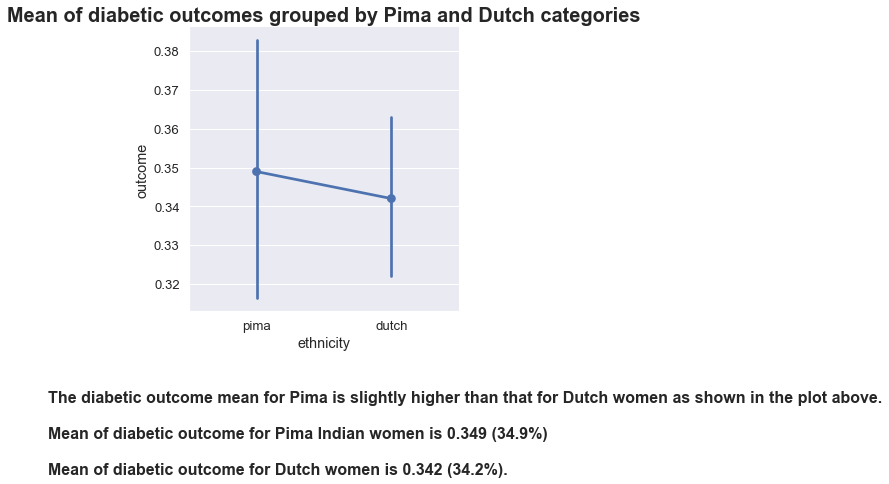

In [7]:
sns.catplot(data=df_combined_clean, x='ethnicity', y='outcome', kind='point')
plt.title('Mean of diabetic outcomes grouped by Pima and Dutch categories', fontsize=20, fontweight='bold')
plt.gcf().text(-0.2, -0.1, 'The diabetic outcome mean for Pima is slightly higher than that for Dutch women as shown in the plot above.', fontsize=16, fontweight='bold')
plt.gcf().text(-0.2, -0.2,'Mean of diabetic outcome for Pima Indian women is 0.349 (34.9%)',fontsize=16, fontweight='bold')
plt.gcf().text(-0.2, -0.3,'Mean of diabetic outcome for Dutch women is 0.342 (34.2%).',fontsize=16, fontweight='bold')
plt.show()

**<span style="background-color:yellow">Note: </span> The diabetic outcome mean for Pima is slightly higher than that for Dutch women as shown in the plot above.** 

## <span style="color:red">HISTOGRAM</span>

**On the next slide, the diabetic outcome mean differences are close to '0' which implies that the Pima and Dutch women are roughly equally diabetic.   The null hypothesis test is that there is NO difference in diabetic means between Pima and Dutch women.  
The alternative hypothesis is that there is a difference. The calculated p-value is 0.686.   
Since the p-value is greater than alpha of 0.05 (confidence interval or 95%), we accept the null hypothesis.**

In [8]:
mean_pima = round(df_pima_clean['outcome'].mean(),3)
mean_germany = df_germany_clean['outcome'].mean()
mean_difference = mean_pima - mean_germany

In [9]:
pima_list = df_pima_clean['outcome'].tolist()
dutch_list = df_germany_clean['outcome'].tolist()
all_values = pima_list + dutch_list

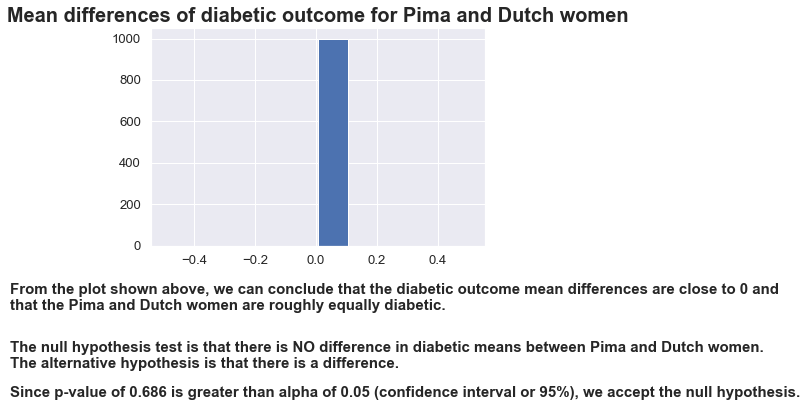

In [10]:
# To simulate rerunning the study, we randomly reassign each data point (outcome) to either group A (Pima women)
# or group B (Dutch women).
import numpy
mean_differences = []
for x in range(1000):
    group_a = []
    group_b = []
    for y in all_values:
        value = numpy.random.rand()
        if value >= 0.5:
            group_a.append(y)
        else:
            group_b.append(y)
    #mean_group_b = round(np.mean(df_pima['outcome']),3)
    mean_group_b = np.mean(df_pima_clean['outcome'])
    mean_group_a = np.mean(df_germany_clean['outcome'])
    iteration_mean_difference = mean_group_b - mean_group_a
    mean_differences.append(iteration_mean_difference)
plt.hist(mean_differences)
plt.title('Mean differences of diabetic outcome for Pima and Dutch women', fontsize=20, fontweight='bold')
plt.gcf().text(-0.2, -0.1,'From the plot shown above, we can conclude that the diabetic outcome mean differences are close to 0 and \nthat the Pima and Dutch women are roughly equally diabetic.',fontsize=15, fontweight='bold')
plt.gcf().text(-0.2, -0.3,'The null hypothesis test is that there is NO difference in diabetic means between Pima and Dutch women. \nThe alternative hypothesis is that there is a difference.',fontsize=15, fontweight='bold')
plt.gcf().text(-0.2, -0.4,'Since p-value of 0.686 is greater than alpha of 0.05 (confidence interval or 95%), we accept the null hypothesis.',fontsize=15, fontweight='bold') 
plt.show()

**<span style="background-color:yellow">Plot Analysis: </span> From the plot shown above, we can conclude that the diabetic outcome mean differences are close to '0' and that the Pima and Dutch women are roughly equally diabetic.** 

In [11]:
from scipy import stats

stats.ttest_1samp(pima_list, 0.342)

Ttest_1sampResult(statistic=0.40430743910226374, pvalue=0.686099368413374)

**<span style="background-color:yellow">Note: </span> The null hypothesis test is that there is NO difference in diabetic means between Pima and Dutch women.  
The alternative hypothesis is that there is a difference.  
Since p-value of 0.686 is greater than alpha of 0.05 (confidence interval or 95%), we accept the null hypothesis.** 